In [93]:
import numpy as np
import matplotlib.pyplot as plt
# from scipy.spatial import Voronoi, voronoi_plot_2d
import pandas as pd

In [94]:
file_path = "voidcat/S-voids-cat.txt"

columns = [
    "VoidID", "RA_deg", "Dec_deg", "redshift", "R_eff_Mpch", "delta_min",
    "delta_avg", "lambda_v", "DensRatio", "Theta_eff_deg", "EdgeFlag"
]

df = pd.read_csv(file_path, delim_whitespace=True, skiprows=2, header=None, names=columns)


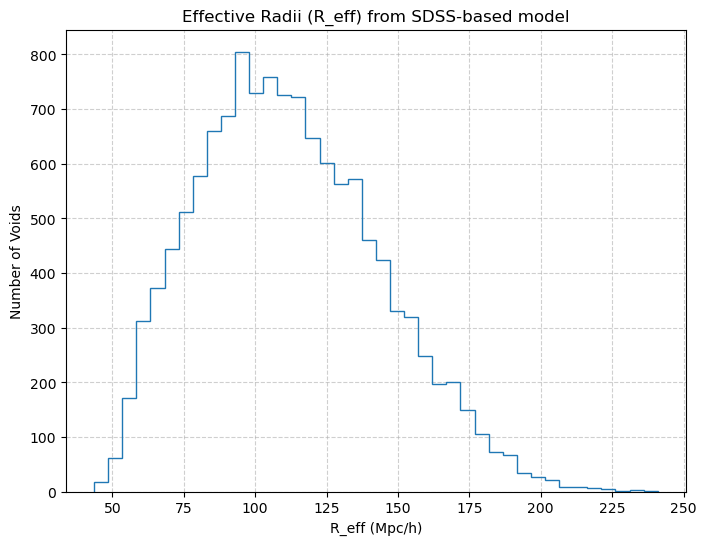

In [95]:
r_eff = df["R_eff_Mpch"]

plt.figure(figsize=(8,6))
plt.hist(r_eff, bins=40, histtype="step")

plt.xlabel("R_eff (Mpc/h)")
plt.ylabel("Number of Voids")
plt.title("Effective Radii (R_eff) from SDSS-based model")
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [96]:
file_path1 = "voidcat/D-voids-cat.txt"

columns = [
    "VoidID", "RA_deg", "Dec_deg", "redshift", "R_eff_Mpch", "delta_min",
    "delta_avg", "lambda_v", "DensRatio", "Theta_eff_deg", "EdgeFlag"
]

df1 = pd.read_csv(file_path1, delim_whitespace=True, skiprows=2, header=None, names=columns)

In [97]:
file_path2 = "voidcat/DS-voids-cat.txt"

columns = [
    "VoidID", "RA_deg", "Dec_deg", "redshift", "R_eff_Mpch", "delta_min",
    "delta_avg", "lambda_v", "DensRatio", "Theta_eff_deg", "EdgeFlag"
]

df2 = pd.read_csv(file_path2, delim_whitespace=True, skiprows=2, header=None, names=columns)

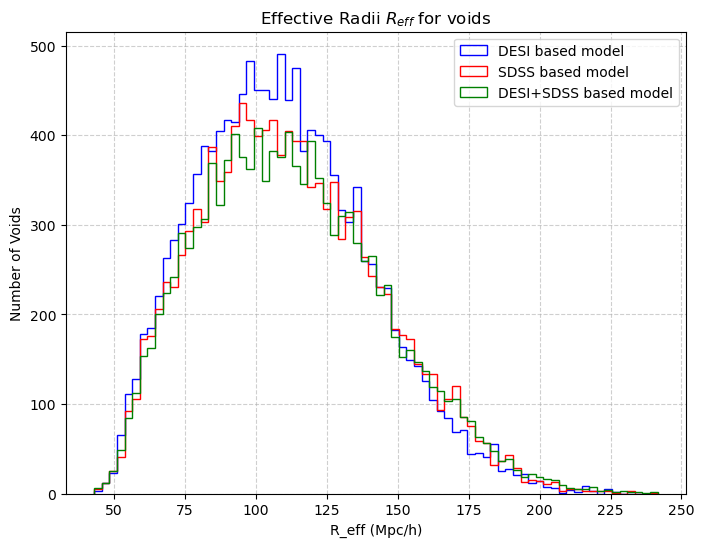

In [109]:
r_eff1 = df1["R_eff_Mpch"]
r_eff2 = df2["R_eff_Mpch"]

all_r_eff = np.concatenate([r_eff1, r_eff, r_eff2])
bin_edges = np.histogram_bin_edges(all_r_eff, bins=74)

plt.figure(figsize=(8,6))
plt.hist(r_eff1, bins=bin_edges, histtype="step", color='b', label='DESI based model')
plt.hist(r_eff, bins=bin_edges, histtype="step", color='r', label='SDSS based model')
plt.hist(r_eff2, bins=bin_edges, histtype="step", color='g', label='DESI+SDSS based model')


#bins setup needed - 정확하게 같은 bin 으로 셋업될 수 있도록.

plt.xlabel("R_eff (Mpc/h)")
plt.ylabel("Number of Voids")
plt.title(r"Effective Radii $R_{eff}$ for voids")
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()
plt.show()

In [124]:
# 각각의 중간값 계산
median1 = np.median(r_eff1)
median_sdss = np.median(r_eff)
median2 = np.median(r_eff2)

print(f"DESI-based model median R_eff: {median1:.2f} Mpc/h")
print(f"SDSS-based model median R_eff: {median_sdss:.2f} Mpc/h")
print(f"DESI+SDSS-based model median R_eff: {median2:.2f} Mpc/h")

DESI-based model median R_eff: 107.55 Mpc/h
SDSS-based model median R_eff: 109.31 Mpc/h
DESI+SDSS-based model median R_eff: 110.06 Mpc/h


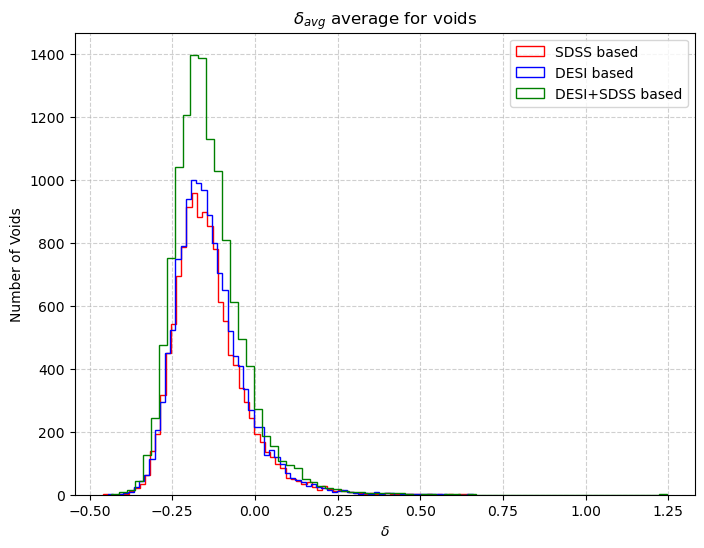

In [116]:
delta = df['delta_avg']
delta1 = df1['delta_avg']
delta2 = df2['delta_avg']

# all_delta = np.concatenate([delta, delta1, delta2])
# bin_edges1 = np.histogram_bin_edges(all_delta, bins=70)

plt.figure(figsize=(8,6))

plt.hist(delta, bins=70, histtype="step", color='r', label='SDSS based')
plt.hist(delta1, bins=70, histtype="step", color='b', label='DESI based')
plt.hist(delta2, bins=70, histtype="step", color='g', label='DESI+SDSS based')

plt.xlabel(r"$\delta$")
plt.ylabel("Number of Voids")
plt.title(r"$\delta_{avg}$ average for voids")
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()
plt.show()

In [125]:
median_delta_sdss = np.median(delta)
median_delta_desi = np.median(delta1)
median_delta_combined = np.median(delta2)

# 출력
print(f"SDSS-based model median δ_avg: {median_delta_sdss:.3f}")
print(f"DESI-based model median δ_avg: {median_delta_desi:.3f}")
print(f"DESI+SDSS-based model median δ_avg: {median_delta_combined:.3f}")

SDSS-based model median δ_avg: -0.154
DESI-based model median δ_avg: -0.153
DESI+SDSS-based model median δ_avg: -0.156


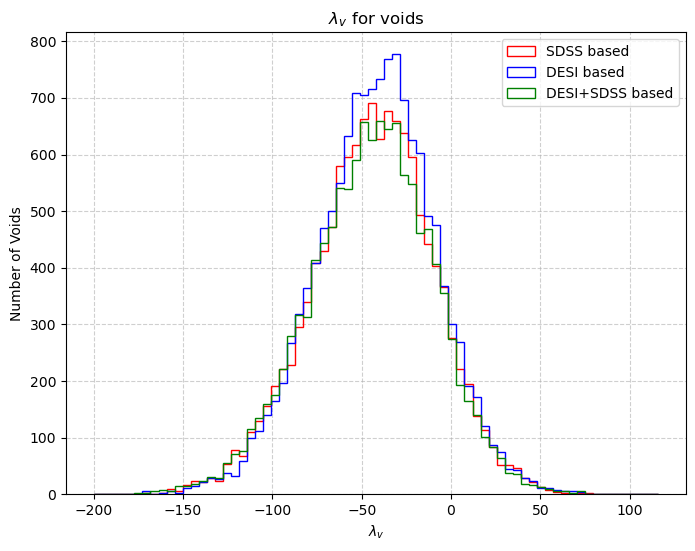

In [129]:
lam = df['lambda_v']
lam1 = df1['lambda_v']
lam2 = df2['lambda_v']

all_lam = np.concatenate([lam, lam1, lam2])
bin_edges2 = np.histogram_bin_edges(all_lam, bins=70)

plt.figure(figsize=(8,6))

plt.hist(lam, bins=bin_edges2, histtype="step", color='r', label='SDSS based')
plt.hist(lam1, bins=bin_edges2, histtype="step", color='b', label='DESI based')
plt.hist(lam2, bins=bin_edges2, histtype="step", color='g', label='DESI+SDSS based')


plt.xlabel(r"$\lambda_v$")
plt.ylabel("Number of Voids")
plt.title(r"$\lambda_v$ for voids")
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()
plt.show()

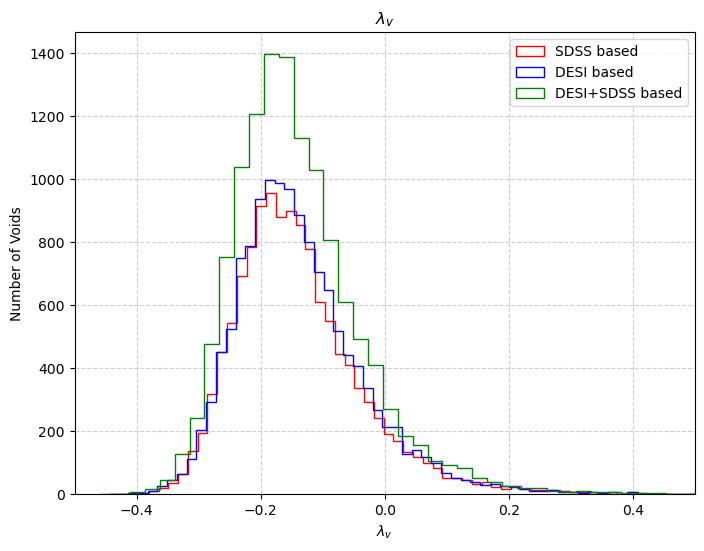

In [101]:
# 범위 조정

plt.figure(figsize=(8,6))

plt.hist(delta, bins=70, histtype="step", color='r', label='SDSS based')
plt.hist(delta1, bins=70, histtype="step", color='b', label='DESI based')
plt.hist(delta2, bins=70, histtype="step", color='g', label='DESI+SDSS based')

plt.xlim(-0.5, 0.5)
plt.xlabel(r"$\lambda_v$")
plt.ylabel("Number of Voids")
plt.title(r"$\lambda_v$")
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()
plt.show()

### Clustering

In [102]:
#cluster - DS model
clrstr = "voidcat/DS-clusters-cat.txt"
#cluster - D model
clrstr1 = "voidcat/D-clusters-cat.txt"
#cluster - S model
clrstr2 = "voidcat/S-clusters-cat.txt"

columns = [
    "ClusterID", "RA(deg)", "Dec(deg)", "redshift", "R_eff(Mpc/h)", "delta_max",
    "delta_avg", "lambda_c", "DensRatio", "Theta_eff(deg)", "EdgeFlag"
]

dfc = pd.read_csv(clrstr, delim_whitespace=True, skiprows=2, header=None, names=columns) #DS
dfc1 = pd.read_csv(clrstr1, delim_whitespace=True, skiprows=2, header=None, names=columns) #D
dfc2 = pd.read_csv(clrstr2, delim_whitespace=True, skiprows=2, header=None, names=columns) #S


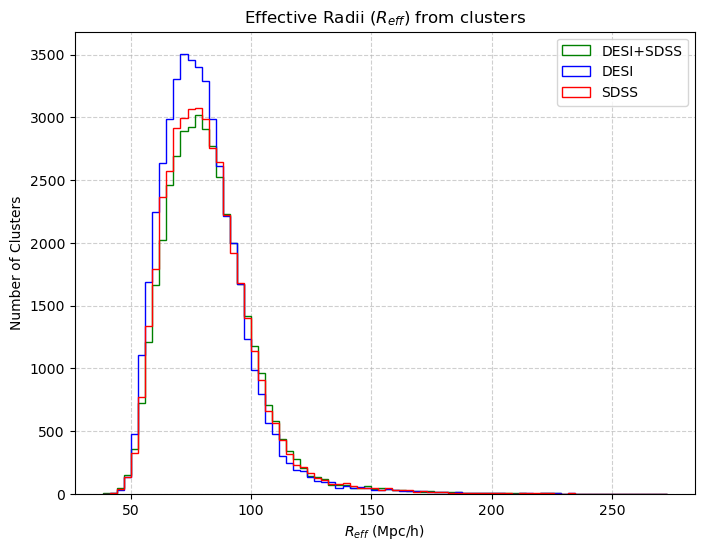

In [118]:
cr_eff = dfc["R_eff(Mpc/h)"]
cr_eff1 = dfc1["R_eff(Mpc/h)"]
cr_eff2 = dfc2["R_eff(Mpc/h)"]

all_cr = np.concatenate([cr_eff, cr_eff1, cr_eff2])
cbin_edges = np.histogram_bin_edges(all_cr, bins=80)

plt.figure(figsize=(8,6))

plt.hist(cr_eff, bins=cbin_edges, histtype="step", color='g', label='DESI+SDSS')
plt.hist(cr_eff1, bins=cbin_edges, histtype="step", color='b', label='DESI')
plt.hist(cr_eff2, bins=cbin_edges, histtype="step", color='r', label='SDSS')

plt.xlabel(r"$R_{eff}$ (Mpc/h)")
plt.ylabel("Number of Clusters")
plt.title(r"Effective Radii ($R_{eff}$) from clusters")
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()
plt.show()

In [126]:
# 각각의 중간값 계산
median1 = np.median(cr_eff1)
median_sdss = np.median(cr_eff)
median2 = np.median(cr_eff2)

print(f"DESI-based model median R_eff: {median1:.2f} Mpc/h")
print(f"SDSS-based model median R_eff: {median_sdss:.2f} Mpc/h")
print(f"DESI+SDSS-based model median R_eff: {median2:.2f} Mpc/h")

DESI-based model median R_eff: 77.61 Mpc/h
SDSS-based model median R_eff: 80.01 Mpc/h
DESI+SDSS-based model median R_eff: 79.36 Mpc/h


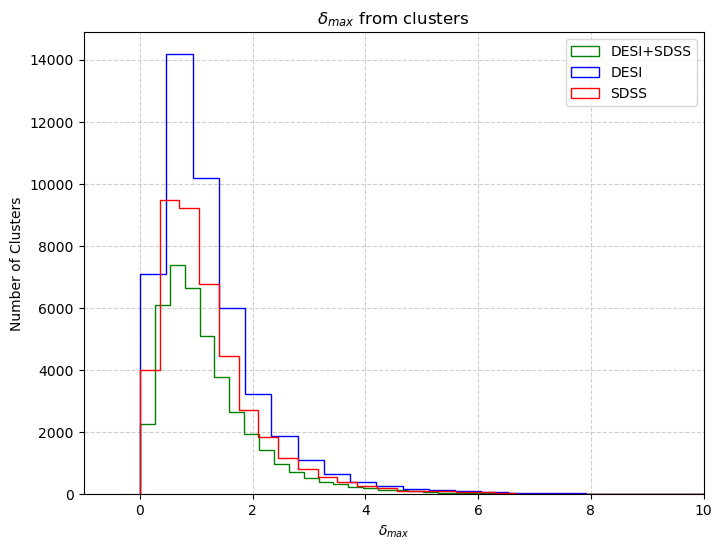

In [120]:
cr_delta = dfc["delta_max"]
cr_delta1 = dfc1["delta_max"]
cr_delta2 = dfc2["delta_max"]

plt.figure(figsize=(8,6))

plt.hist(cr_delta, bins=70, histtype="step", color='g', label='DESI+SDSS')
plt.hist(cr_delta1, bins=70, histtype="step", color='b', label='DESI')
plt.hist(cr_delta2, bins=70, histtype="step", color='r', label='SDSS')

plt.xlim(-1, 10)
plt.xlabel(r"$\delta_{max}$")
plt.ylabel("Number of Clusters")
plt.title(r"$\delta_{max}$ from clusters")
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()
plt.show()

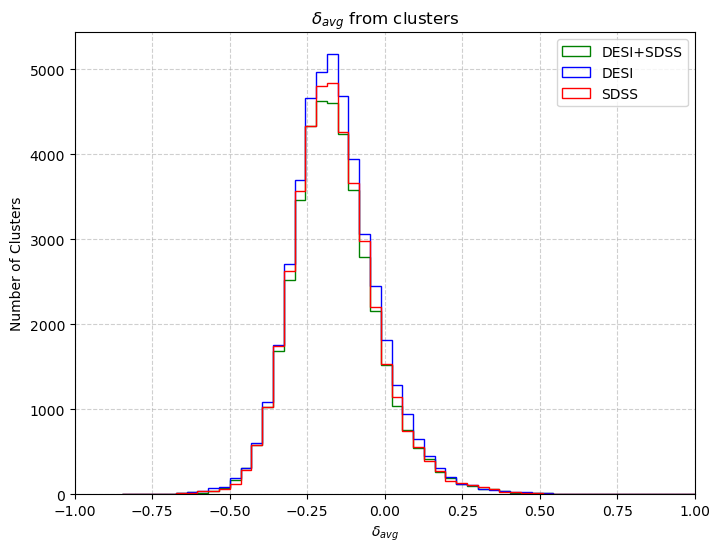

In [114]:
cr_del = dfc["delta_avg"]
cr_del1 = dfc1["delta_avg"]
cr_del2 = dfc2["delta_avg"]

all_del = np.concatenate([cr_del, cr_del1, cr_del2])
bin_del = np.histogram_bin_edges(all_del, bins=70)

plt.figure(figsize=(8,6))

plt.hist(cr_del, bins=bin_del, histtype="step", color='g', label='DESI+SDSS')
plt.hist(cr_del1, bins=bin_del, histtype="step", color='b', label='DESI')
plt.hist(cr_del2, bins=bin_del, histtype="step", color='r', label='SDSS')

plt.xlim(-1, 1)
plt.xlabel(r"$\delta_{avg}$")
plt.ylabel("Number of Clusters")
plt.title(r"$\delta_{avg}$ from clusters")
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()
plt.show()

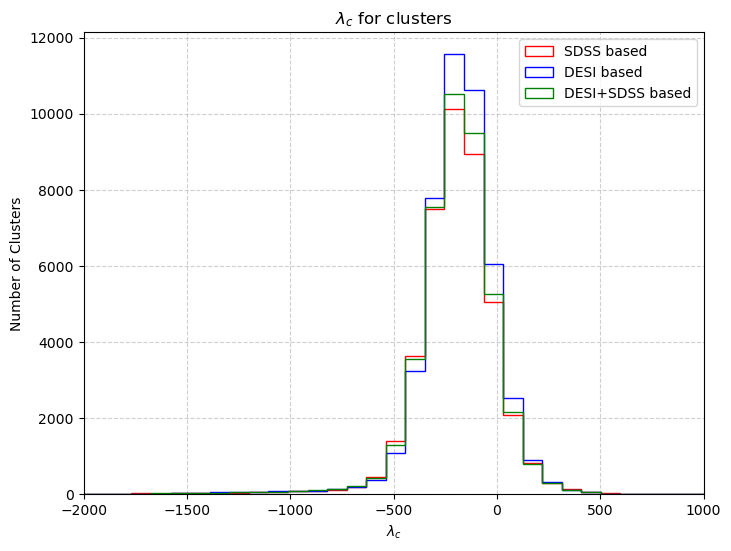

In [123]:
lamc = dfc['lambda_c']
lamc1 = dfc1['lambda_c']
lamc2 = dfc2['lambda_c']

all_lamc = np.concatenate([lamc, lamc1, lamc2])
bin_edges2 = np.histogram_bin_edges(all_lamc, bins=70)

plt.figure(figsize=(8,6))

plt.hist(lamc, bins=bin_edges2, histtype="step", color='r', label='SDSS based')
plt.hist(lamc1, bins=bin_edges2, histtype="step", color='b', label='DESI based')
plt.hist(lamc2, bins=bin_edges2, histtype="step", color='g', label='DESI+SDSS based')

plt.xlim(-2000, 1000)
plt.xlabel(r"$\lambda_c$")
plt.ylabel("Number of Clusters")
plt.title(r"$\lambda_c$ for clusters")
plt.grid(True, linestyle='--', alpha=0.6)

plt.legend()
plt.show()